<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-engineering/blob/master/Unit%207%20Introduction%20to%20Well-Test%20Analysis/notebook/7_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unit 7 Introduction to Well-Test Analysis**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!git clone https://www.github.com/yohanesnuwara/reservoir-engineering

Cloning into 'reservoir-engineering'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 483 (delta 48), reused 0 (delta 0), pack-reused 360
Receiving objects: 100% (483/483), 1.11 MiB | 11.35 MiB/s, done.
Resolving deltas: 100% (202/202), done.


## **Chap 7.2 Constant-Rate Flow Tests**

### Example 7.1 Analysis of a Constant-Rate Well Test

Text(0, 0.5, 'Pressure (psia)')

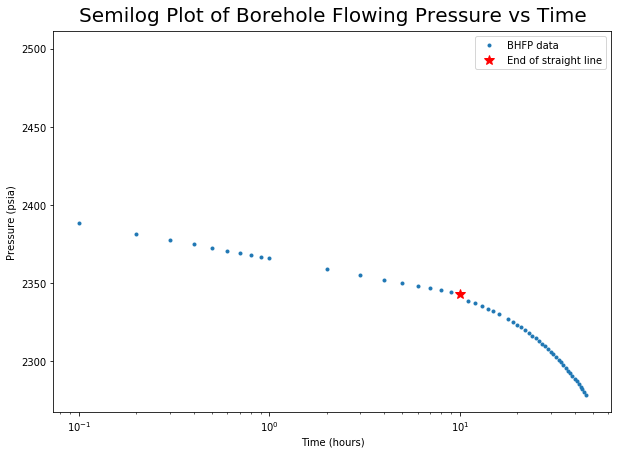

In [94]:
data_bhfp = pd.read_csv('/content/reservoir-engineering/Unit 7 Introduction to Well-Test Analysis/data/Table 7.2-Reservoir Parameters and BHFP Example 7.1.csv')

axisx = data_bhfp.t
axisy = data_bhfp.p

"guess time index in time data that mark the end of straight line for regression (Fig 7.1 in book)"
index = 19 # continuously adjust this value until it reaches the point

# plot borehole flowing pressure vs time
plt.figure(figsize=(10, 7))
p1 = plt.semilogx(axisx, axisy, '.')

# plot the guessed 'end of straight' line for regression
p2 = plt.semilogx(data_bhfp.t[index], data_bhfp.p[index], '*', color='r', ms=10)
plt.legend((p1[0], p2[0]), ('BHFP data', 'End of straight line'))

plt.title('Semilog Plot of Borehole Flowing Pressure vs Time', size=20, pad=10)
plt.xlabel('Time (hours)'); plt.ylabel('Pressure (psia)')

To do regression we cut the dataframe from `df[0]` until the index of our guessed *end of straight line* `df[index]`. Only if the BHFP data contains pressure at `time = 0` (first row), drop the first row `df[0]`, because when log operation is underway, `log(0) = indefinite`. 

In [95]:
# cut dataframe from index 0 to index of end of straight line
df1 = data_bhfp.iloc[:index+1, :]

# drop the first row with time=0, because when log operation is underway, log(0) = indefinite
dff1 = df1.drop(df1.index[0])

x = np.log(np.array(dff1.t))
y = np.array(dff1.p)

def regression(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

c, m = regression(x,y)
print("Slope of semilog plot of BHFP vs time:", m)
print("Pressure intercept of semilog plot of BHFP vs time:", c, "psia")

Slope of semilog plot of BHFP vs time: -9.816049286818531
Pressure intercept of semilog plot of BHFP vs time: 2365.6951804701193 psia


Plot the regression line on the semilog plot

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Pressure (psia)')

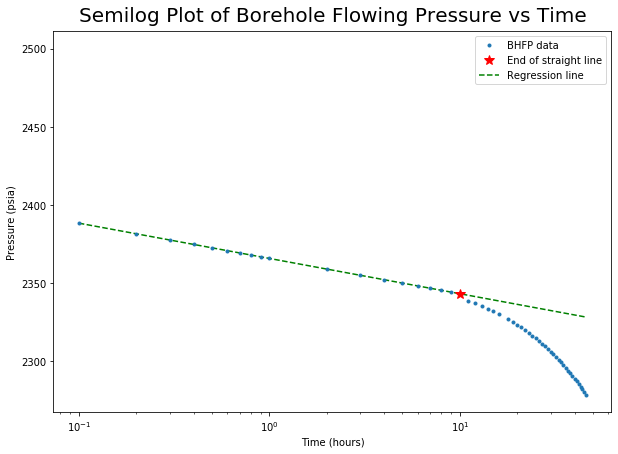

In [96]:
# plot regression line on semilog plot

# x_reg = dff1.t
# y_reg = m * x + c
# x_reg = np.log(np.array(df1.t))
x_reg = np.log(np.array(data_bhfp.t))
y_reg = m * x_reg + c

plt.figure(figsize=(10, 7))

# p3 = plt.semilogx(df1.t, y_reg, '--', color='g', ms=0.5)
p3 = plt.semilogx(data_bhfp.t, y_reg, '--', color='g', ms=0.5)

# plot borehole flowing pressure vs time
p1 = plt.semilogx(axisx, axisy, '.')

# plot the guessed 'end of straight' line for regression
p2 = plt.semilogx(data_bhfp.t[index], data_bhfp.p[index], '*', color='r', ms=10)
plt.legend((p1[0], p2[0], p3[0]), ('BHFP data', 'End of straight line', 'Regression line'))

plt.title('Semilog Plot of Borehole Flowing Pressure vs Time', size=20, pad=10)
plt.xlabel('Time (hours)'); plt.ylabel('Pressure (psia)')

The first task, determine reservoir permeability from the resulted slope `m` from regression.

In [100]:
"Task 1. determine permeability"

# known reservoir parameters

poro = 0.15
rw = 0.333 # in ft
h = 32 # in ft
qo = 1000 # in STB/d
swi = 0.25
ct = 12E-06 # in psi^-1
pi = 2500 # initial pressure in psia
mu_oil = 2 # in cP
Bo = 1.333 # in RB/STB

# conversion: NONE, all units already in oilfield units

# multiply m with ln(10)

m_cycle = m * np.log(10)
m_cycle # result in psi/cycle

# find k from Eq 7.10 (oilfield units)

k = - (162.6 * qo * Bo * mu_oil) / (m_cycle * h)
print("Permeability calculated from BHFP data:", k, "milidarcies")

Permeability calculated from BHFP data: 599.3469353431107 milidarcies


Second task, determine time to finite acting period. This is different to Example 6.1 in Unit 6 to calculate `t_finite_acting` previously because in Example 6.1, distance to outer boundary of reservoir (`re`) is known. Here in Example 7.1, `re` is not known, so `t_finite_acting` is barely determined by looking at the **semilog plot** above, where the pressure plots **start to deviate from straight line**.  

**Different from the book**, `t_finite_acting` is more likely to start at `t = 10` hours, exactly where we have guessed the *index of end of straight line* as `index = 19` before. 

So leaving out, `t_finite_acting = 10`

In [0]:
"Task 2. determine t finite acting from semilog plot"

t_finite_acting = 10

Third task, determine reservoir size `re`. There are 2 methods: one, presented in the book, using **normal plot of BHFP to time** and determine the slope. The another method, use **Eq 6.16** like in **Unit 6** since `t_finite_acting` has been approximated.  

In [76]:
"Task 3. determine reservoir size"

# method 1. analytical, use previously Eq 6.16

t_Dw = (t_finite_acting * 0.0002637 * k) / (poro * mu_oil * ct * (rw**2))

# solve re from t_Dw = 0.25 * r_eD**2

r_eD_square = 4 * t_Dw
re = rw * np.sqrt(r_eD_square)
print("Reservoir size from solving analytically Eq 6.16:", re, "ft")

Reservoir size from solving analytically Eq 6.16: 1325.174147255867 ft


Text(0, 0.5, 'Pressure (psia)')

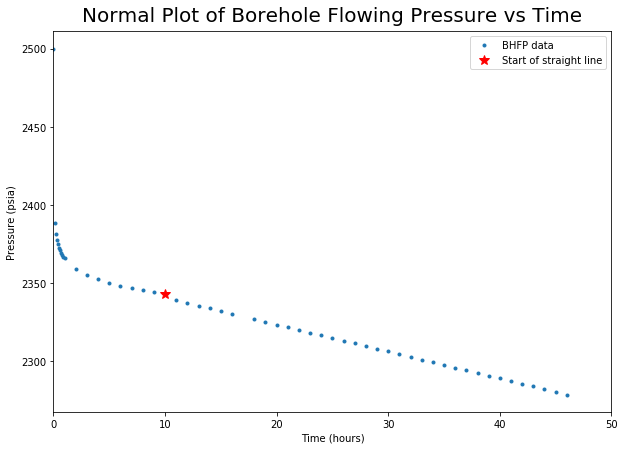

In [71]:
# find re from graphical (book's method), again guess for the straight line

"time when plot starts deviating equals to index at t_finite_acting, similar index to previous semilog plot"
index2 = index # similar to the index of semilog plot

# plot borehole flowing pressure vs time
plt.figure(figsize=(10, 7))
p1 = plt.plot(axisx, axisy, '.')

# plot the guessed 'end of straight' line for regression
p2 = plt.plot(data_bhfp.t[index2], data_bhfp.p[index2], '*', color='r', ms=10)
plt.legend((p1[0], p2[0]), ('BHFP data', 'Start of straight line'))

plt.xlim(0, 50)
plt.title('Normal Plot of Borehole Flowing Pressure vs Time', size=20, pad=10)
plt.xlabel('Time (hours)'); plt.ylabel('Pressure (psia)')

In [72]:
# cut dataframe from index of start of straight line to the last index
dff2 = data_bhfp.iloc[index2:, :]

x2 = np.array(dff2.t)
y2 = np.array(dff2.p)

def regression(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

c2, m2 = regression(x2,y2)
print("Slope of semilog plot of BHFP vs time:", m2)
print("Pressure intercept of semilog plot of BHFP vs time:", c2, "psia")

Slope of semilog plot of BHFP vs time: -1.7357010538030258
Pressure intercept of semilog plot of BHFP vs time: 2358.0966492729244 psia


Text(0, 0.5, 'Pressure (psia)')

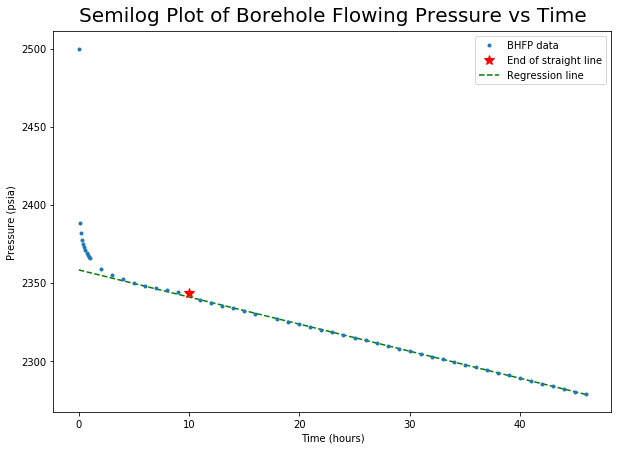

In [73]:
# plot regression line on plot

x_reg2 = np.array(data_bhfp.t)
y_reg2 = m2 * x_reg2 + c2

plt.figure(figsize=(10, 7))

p3 = plt.plot(data_bhfp.t, y_reg2, '--', color='g', ms=0.5)

# plot borehole flowing pressure vs time
p1 = plt.plot(axisx, axisy, '.')

# plot the guessed 'end of straight' line for regression
p2 = plt.plot(data_bhfp.t[index2], data_bhfp.p[index2], '*', color='r', ms=10)
plt.legend((p1[0], p2[0], p3[0]), ('BHFP data', 'End of straight line', 'Regression line'))

plt.title('Semilog Plot of Borehole Flowing Pressure vs Time', size=20, pad=10)
plt.xlabel('Time (hours)'); plt.ylabel('Pressure (psia)')

In [77]:
# re-arranging Eq 7.22

# m2 is not converted into psi/cycle, remains psi/hour

re2 = np.sqrt(-((0.07447 * qo * Bo) / (poro * h * ct * m2)))
print("Reservoir Size using Eq 7.22 graphical normal plot:", re2, "ft")

Reservoir Size using Eq 7.22 graphical normal plot: 996.4535215820936 ft


The fourth task, is to determine the **skin factor**, using Eq 7.12. 

In [105]:
"Task 4. calculate skin factor"

# determine first, the b1hr (pressure at 1 hour from regression line)
t1hr = 1 # time at 1 hour
b1hr = m2 * t1hr + c2 # m2 and c2 are slope and intercept of the second regression line from normal plot

# calculate skin factor, in oilfied formula

# m (slope) is m from semilog plot, m_cycle 

# first = (((pi - b1hr) / -m_cycle))
s = 1.1513 * (((pi - b1hr) / -m_cycle) - np.log10(k / (poro * mu_oil * ct * (rw**2))) + 3.2275)
print("Pressure intercept at 1 hour:", b1hr, "psia")
print("Skin factor using Eq 7.1:", s)

Pressure intercept at 1 hour: 2356.3609482191214 psia
Skin factor using Eq 7.1: 0.4675191449502658


Which is little different from the result of the book. But, it's fine. 

## **Chapter 7.3 Multirate Flow Tests**

### Example 7.2 Analysis of a Multirate Flow Test